# System with Two Catenary lines

In [1]:
import numpy as np
import math as math
from scipy import optimize
import matplotlib.pylab as plt
from matplotlib.legend_handler import HandlerLine2D

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
pass

## Define properties of the lines

- Keeping all variables in SI Units (kg, m, s) and force in N
- Assuming both lines have the same properties.
- A new quantity, anch_sep, to define the distance between the two anchors.

In [2]:
g = 9.81 #m/s2
W1_pm = 376 #kg/m
EA1 = 1861000000 #N
L1_tot = 600 #m

W2_pm = 376 #kg/m
EA2 = 1861000000 #N
L2_tot = 600 #m

d0 = 200 #m still-water depth

anch_sep = 1053.67 #m
moor_sep = 50 #m

x1_anch = 0
x2_anch = anch_sep-x1_anch

## Define all functions

We carry forward the functions from the previous notebook.

In [3]:
def catenary_end_xz(W_pm, L_tot, EA, V0, H0, L_susp):
    
    W = W_pm*L_susp*g
        
    s = L_susp    
    z_t1 = 1 + (V0/H0)**2
    z_t2 = 1 + ((V0 - W*s/L_susp)/H0)**2
    z = W*s/EA * (s/2/L_susp - V0/W) - H0*L_susp/W*(np.sqrt(z_t1) - np.sqrt(z_t2))            
    x_susp = H0*s/EA + H0*L_susp/W*(np.arcsinh(V0/H0) - np.arcsinh((V0 - W*s/L_susp)/H0))
    x_bed = L_tot - L_susp
    x = x_bed + x_susp
        
    return x, z

In [4]:
def catenary_xz(W_pm, L_tot, EA, V0, H0, L_susp, ds):
        
    W = W_pm * L_susp * g
    
    # c_s = [0]
    # c_x = [L_tot - L_susp]
    # c_z = [0]
    # c_H = [H0]
    # c_V = [V0]
    
    c_s = [0, 0]    
    c_x = [0, L_tot - L_susp]
    c_z = [0, 0]
    c_H = [H0, H0]
    c_V = [V0, V0]
    
    Ns = math.floor(L_susp/ds)
    ds = L_susp/Ns
    for i in range(1,Ns+1):
        s = c_s[-1]+ds        
        z_t1 = 1 + (V0/H0)**2
        z_t2 = 1 + ((V0 - W*s/L_susp)/H0)**2
        z = W*s/EA * (s/2/L_susp-V0/W) - H0*L_susp/W*(np.sqrt(z_t1) - np.sqrt(z_t2))        
        x_susp = H0*s/EA + H0*L_susp/W*(np.arcsinh(V0/H0) - np.arcsinh((V0 - W*s/L_susp)/H0))        
        V = V0 + W_pm*s*g
        x = L_tot - L_susp + x_susp
        
        c_s.append(s)        
        c_x.append( x )
        c_z.append( z )        
        c_V.append( V )
        
    print(c_s[-1], c_x[-1], c_z[-1], c_V[-1])
        
    return c_s, c_x, c_z, c_V

In [5]:
def objective_fnc(sol, *data):        
    H0 = sol[0]
    L = sol[1] #suspended length
    W_pm, L_tot, EA, V0, xtarg, ztarg  = data
    x, z = catenary_end_xz(W_pm, L_tot, EA, V0, H0, L)    
    return np.array( [abs(ztarg-z),  abs(xtarg-x)] )

## Initial position

- For the given problem, both lines have the same properties.
- The target position is specified by x0,z0, indicating the centre of the body.
    - => x0_targ, z0_targ = (350, d0)


In [6]:
x0_targ, z0_targ = (1053.67/2, d0)

x1_targ, z1_targ = (x0_targ - moor_sep/2.0, d0)
data1 = (W1_pm, L1_tot, EA1, 0, x1_targ, z1_targ)
H1, L1_susp = optimize.fsolve(objective_fnc,np.array([10,10]),args=data1)

x2_targ, z2_targ = (anch_sep - moor_sep - x1_targ, d0)
data2 = (W2_pm, L2_tot, EA2, 0, x2_targ, z2_targ)
H2, L2_susp = optimize.fsolve(objective_fnc,np.array([10,10]),args=data2)

print(H1, L1_susp)
print(H2, L2_susp)
print("Net Horizontal Force = ",(H2-H1)/1000)
print("x1_moor, x2_moor = ",x1_targ, anch_sep-x2_targ)

468071.26801212307 301.16520807003155
468071.26801212307 301.16520807003155
Net Horizontal Force =  0.0
x1_moor, x2_moor =  501.83500000000004 551.835


Plotting the two lines

301.1652080700291 501.8349999999991 199.99999999999773 1110865.9398787867
301.1652080700291 501.8349999999991 199.99999999999773 1110865.9398787867
0.0


/home/shagun/.local/lib/python3.8/site-packages/matplotlib/quiver.py:658: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/shagun/.local/lib/python3.8/site-packages/matplotlib/quiver.py:658: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


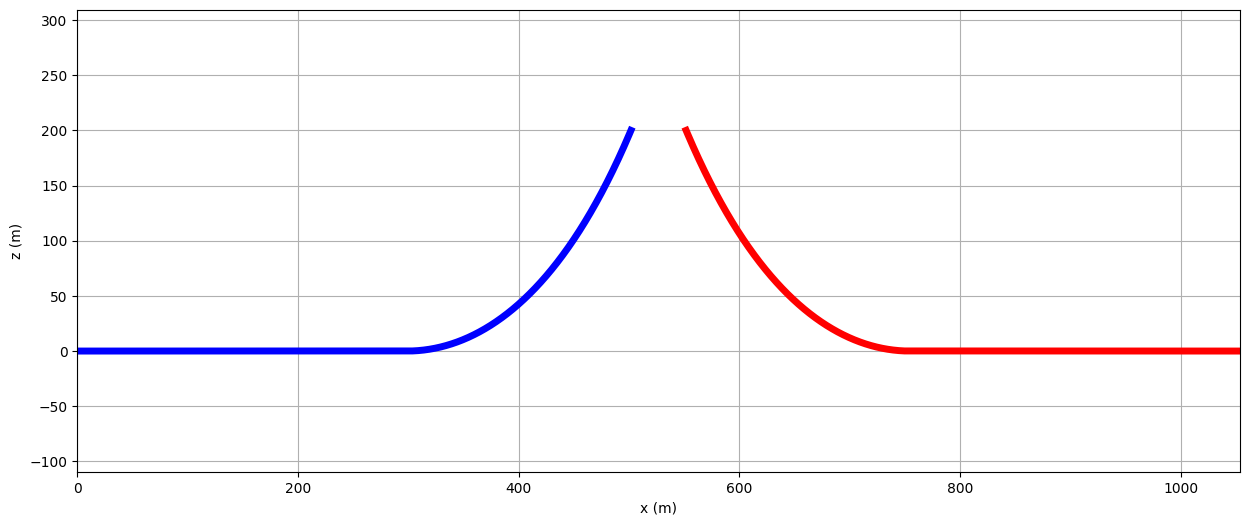

In [7]:
l1_s, l1_x, l1_z, l1_V = catenary_xz(W1_pm, L1_tot, EA1, 0, H1, L1_susp, 0.1)
l2_s, l2_x, l2_z, l2_V = catenary_xz(W2_pm, L2_tot, EA2, 0, H2, L2_susp, 0.1)

plt.plot(l1_x, l1_z, 'b-', lw=5)
plt.plot([anch_sep-x for x in l2_x], l2_z, 'r-', lw=5)
plt.quiver(x0_targ, z0_targ, H2-H1, 0)
plt.axis("equal")
plt.grid("on")
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.xlim(left=0, right=anch_sep)
print((H2-H1)/1000)
pass

## Force-excursion diagram

- We calculate the force excursion diagram for the system
- The x1_targ will be varied between two intervals to calculate the net horizontal force on the body.

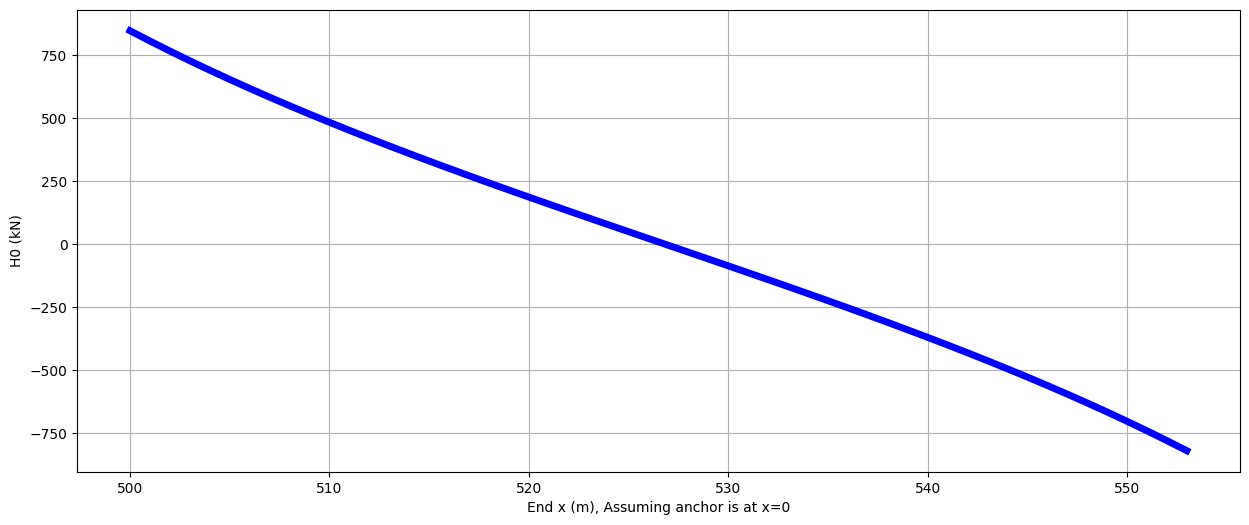

In [8]:
x0_targ_array = np.arange(500,554)
x1_targ_array = [x - moor_sep/2 for x in x0_targ_array]
x2_targ_array = [anch_sep - moor_sep - x for x in x1_targ_array]

sol1_array = [optimize.fsolve(objective_fnc,
                             np.array([10,10]),
                             args=(W1_pm, L1_tot, EA1, 0, lx, z1_targ)) 
              for lx in x1_targ_array]
sol2_array = [optimize.fsolve(objective_fnc,
                             np.array([10,10]),
                             args=(W2_pm, L2_tot, EA2, 0, lx, z2_targ)) 
              for lx in x2_targ_array]

H1_array = [sol[0] for sol in sol1_array]
H2_array = [sol[0] for sol in sol2_array]

plt.subplots(1,1)
plt.plot( x0_targ_array, 
         [(H2l-H1l)/1000 for H1l,H2l in zip(H1_array,H2_array)], 'b-', lw=5)
plt.grid("on")
plt.xlabel('End x (m), Assuming anchor is at x=0')
plt.ylabel('H0 (kN)')
#plt.xlim(left=549, right=551)
#plt.ylim(bottom=2350, top=2450)
pass